# Análisis EDA

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


train_dir = '/Users/ignaciocarrenoromero/PROYECTOS PERSONALES/MALARIA-DETECTOR/training_models/data/Train'
test_dir = '/Users/ignaciocarrenoromero/PROYECTOS PERSONALES/MALARIA-DETECTOR/training_models/data/Test'

categories = ['Parasitized', 'Uninfected']

image_extensions = ['.png', '.jpg', '.jpeg']

def load_images_from_folder(folder):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(folder, category)
        for img_name in os.listdir(path):
            # Ignorar archivos que no sean imágenes
            if not any(img_name.lower().endswith(ext) for ext in image_extensions):
                continue
            img_path = os.path.join(path, img_name)
            try:
                image = Image.open(img_path)
                image = image.resize((64, 64))  # Redimensionamos a 64x64 píxeles
                images.append(np.array(image))
                labels.append(category)
            except (IOError, UnidentifiedImageError) as e:
                print(f"No se pudo cargar {img_path}: {e}")
    return images, labels

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)


train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

/var/folders/33/pycmx2j52h369vj049x68q4c0000gn/T/ipykernel_4046/1555658668.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


Text(0, 0.5, 'Number of images')

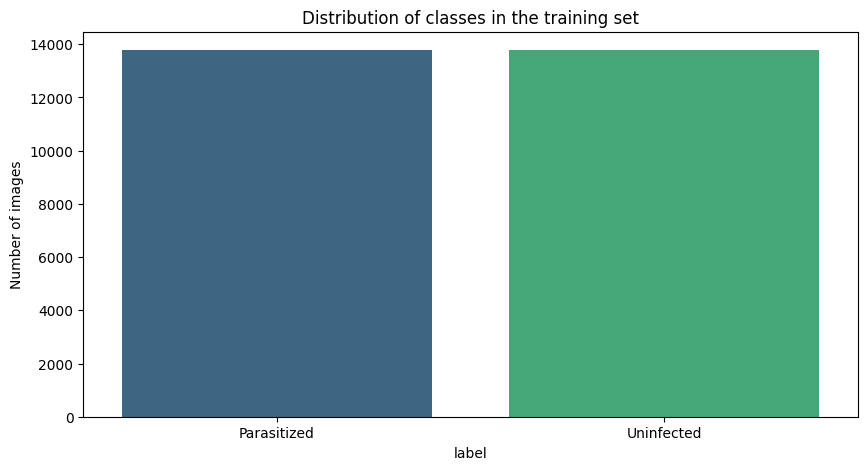

In [14]:
import pandas as pd
import seaborn as sns

labels_df = pd.DataFrame(train_labels, columns=['label'])

class_counts = labels_df['label'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of classes in the training set')
plt.xlabel
plt.ylabel('Number of images')

## 1. Distribución de tamaños de imágenes

/var/folders/33/pycmx2j52h369vj049x68q4c0000gn/T/ipykernel_4046/646503188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='height', data=image_shapes_df, palette='viridis')


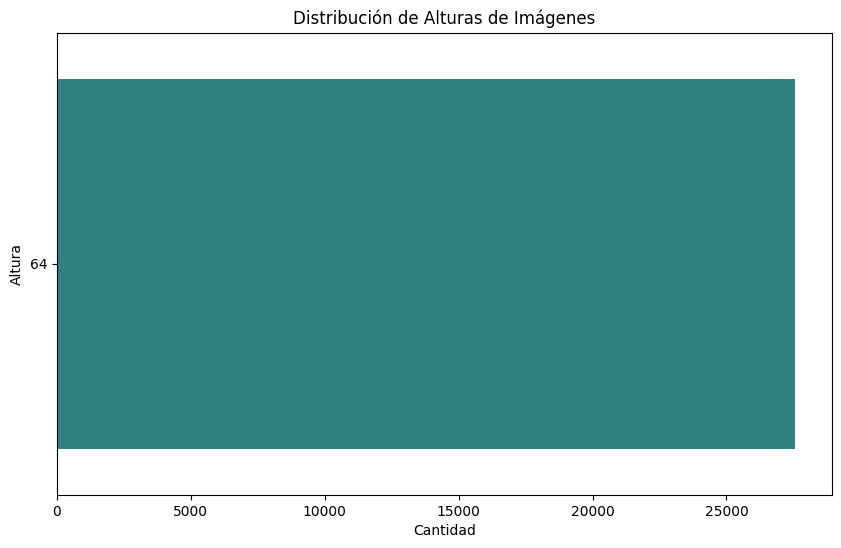

In [15]:
image_shapes = [img.shape for img in train_images]
image_shapes_df = pd.DataFrame(image_shapes, columns=['height', 'width', 'channels'])
plt.figure(figsize=(10, 6))
sns.countplot(y='height', data=image_shapes_df, palette='viridis')
plt.title('Distribución de Alturas de Imágenes')
plt.xlabel('Cantidad')
plt.ylabel('Altura')
plt.show()

## 2. Visualización de algunas imágenes

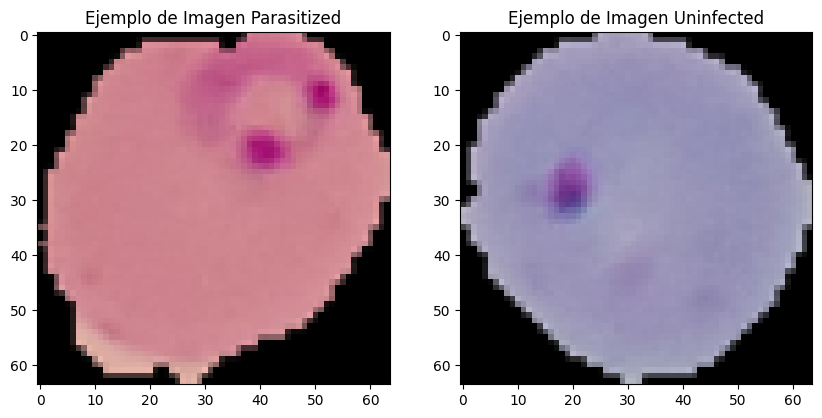

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(train_images[0])
axes[0].set_title('Ejemplo de Imagen Parasitized')
axes[1].imshow(train_images[1])
axes[1].set_title('Ejemplo de Imagen Uninfected')
plt.show()

## 3. Análisis de estadísticas básicas

               mean        median           std
count  27558.000000  27558.000000  27558.000000
mean     119.806824    150.516710     75.283182
std       11.932054     18.358456      5.655554
min       53.368734      0.000000     51.566942
25%      113.513509    142.000000     71.644253
50%      121.264404    150.000000     75.426224
75%      127.837545    160.000000     79.095725
max      157.419189    192.000000     94.341513


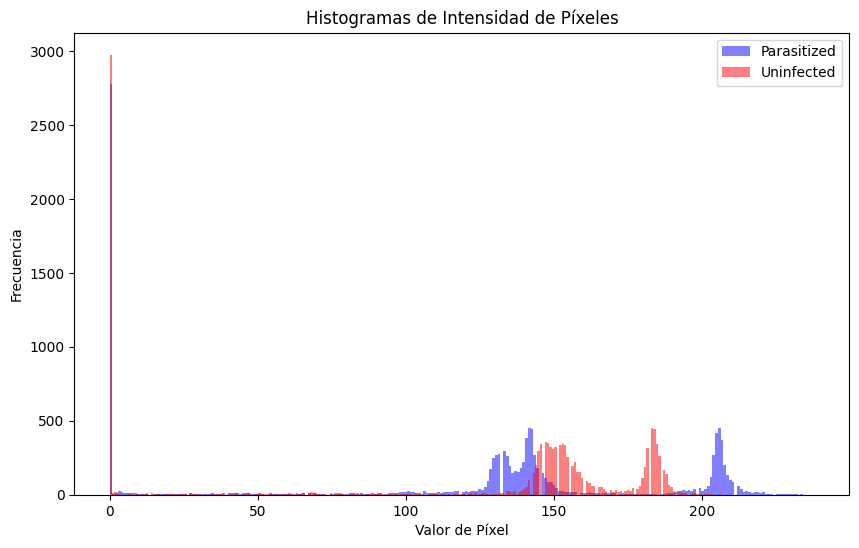

In [17]:
mean_pixel_values = [np.mean(img) for img in train_images]
median_pixel_values = [np.median(img) for img in train_images]
std_pixel_values = [np.std(img) for img in train_images]

stats_df = pd.DataFrame({
    'mean': mean_pixel_values,
    'median': median_pixel_values,
    'std': std_pixel_values
})

print(stats_df.describe())

plt.figure(figsize=(10, 6))
plt.hist(train_images[0].ravel(), bins=256, color='blue', alpha=0.5, label='Parasitized')
plt.hist(train_images[1].ravel(), bins=256, color='red', alpha=0.5, label='Uninfected')
plt.title('Histogramas de Intensidad de Píxeles')
plt.xlabel('Valor de Píxel')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()